<a href="https://colab.research.google.com/github/Amitgm/Image_Classification_traffic_Signs/blob/main/Amit_M3_NB_MiniProject_1_Image_Classification_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

## Grading = 10 Points

In [ ]:
#@title Download the data
!wget -qq https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
!unzip -qq FullIJCNN2013.zip

### Import Required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [ ]:
images = glob.glob("*/*/*.ppm", recursive=True)

In [ ]:
images[8]

'FullIJCNN2013/04/00042.ppm'

In [ ]:
images[8].split("/")[2].split(".")[0]

'00042'

In [ ]:
# YOUR CODE HERE
def convert_ppm_to_png():
  for img in images:

      test_from_img = img.split("/")[1]
      image_name = img.split("/")[2].split(".")[0]

      if not os.path.exists("images_in_png/{}".format(test_from_img)):

          os.makedirs("images_in_png/{}".format(test_from_img))

      img = Image.open(img)
      img = img.resize((30, 30))

      img.save("images_in_png/{}/{}.png".format(test_from_img,image_name))


In [ ]:
convert_ppm_to_png()

#### Reading the png images

In [ ]:
images_png = glob.glob("images_in_png/*/*.png", recursive=True)

In [ ]:
images_png

['images_in_png/04/00052.png',
 'images_in_png/04/00030.png',
 'images_in_png/04/00046.png',
 'images_in_png/04/00005.png',
 'images_in_png/04/00048.png',
 'images_in_png/04/00064.png',
 'images_in_png/04/00003.png',
 'images_in_png/04/00035.png',
 'images_in_png/04/00060.png',
 'images_in_png/04/00042.png',
 'images_in_png/04/00024.png',
 'images_in_png/04/00036.png',
 'images_in_png/04/00022.png',
 'images_in_png/04/00041.png',
 'images_in_png/04/00067.png',
 'images_in_png/04/00062.png',
 'images_in_png/04/00023.png',
 'images_in_png/04/00057.png',
 'images_in_png/04/00010.png',
 'images_in_png/04/00025.png',
 'images_in_png/04/00043.png',
 'images_in_png/04/00004.png',
 'images_in_png/04/00034.png',
 'images_in_png/04/00040.png',
 'images_in_png/04/00026.png',
 'images_in_png/04/00015.png',
 'images_in_png/04/00056.png',
 'images_in_png/04/00016.png',
 'images_in_png/04/00061.png',
 'images_in_png/04/00009.png',
 'images_in_png/04/00017.png',
 'images_in_png/04/00044.png',
 'images

#### Creating array and labels for png images

In [ ]:
arrays = []
labels = []
for path in images_png:
    img = Image.open(path)
    img_array = np.array(img)
    label = path.split("/")[1]
    labels.append(int(label))
    arrays.append(img_array)

In [ ]:
labels

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 39,
 39,
 39,
 39,
 39,
 39,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 37,
 37,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 27,
 27,
 27,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 1

In [ ]:
arrays[1]

array([[[167, 195, 242],
        [168, 195, 243],
        [169, 195, 243],
        ...,
        [113, 126, 147],
        [117, 130, 153],
        [123, 133, 159]],

       [[165, 194, 241],
        [166, 194, 242],
        [169, 194, 243],
        ...,
        [111, 122, 146],
        [114, 124, 148],
        [117, 126, 151]],

       [[162, 192, 240],
        [164, 192, 241],
        [168, 193, 244],
        ...,
        [107, 116, 145],
        [109, 115, 142],
        [109, 116, 141]],

       ...,

       [[106, 118, 149],
        [105, 118, 147],
        [ 99, 114, 139],
        ...,
        [ 47,  49,  63],
        [ 48,  51,  57],
        [ 51,  52,  56]],

       [[ 99, 110, 136],
        [ 99, 108, 132],
        [ 95, 103, 125],
        ...,
        [ 47,  49,  64],
        [ 49,  52,  59],
        [ 53,  56,  59]],

       [[ 95, 105, 125],
        [ 93, 100, 119],
        [ 88,  93, 111],
        ...,
        [ 46,  49,  64],
        [ 49,  52,  60],
        [ 55,  58,  61]]], dtype=uint8)

### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

#### Getting all the first images from each sub folder

In [ ]:
# YOUR CODE HERE

main_dir = "images_in_png"

# Get all subfolders (class names)
class_folders = [f for f in os.listdir(main_dir) if os.path.isdir(os.path.join(main_dir, f))]

# Dictionary to store one sample image per folder
sample_images = {}

for class_name in class_folders:
    class_path = os.path.join(main_dir, class_name)

    # Get all image files inside the class folder (modify extension if needed)
    image_files = glob.glob(os.path.join(class_path, "*.png"))

    if image_files:  # Ensure there are images
        sample_images[class_name] = image_files[0]  # Pick the first image

#### Plotting all the images in the dataset

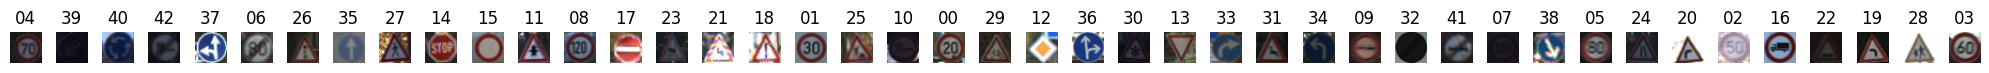

In [ ]:
num_classes = len(sample_images)
plt.figure(figsize=(20, 5))  # Adjust figure size dynamically

for i, (class_name, image_path) in enumerate(sample_images.items()):
    img = Image.open(image_path)  # Open image
    img_array = np.array(img)  # Convert to array

    plt.subplot(1, num_classes, i + 1)  # 1 row, `num_classes` columns
    plt.imshow(img_array)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

#### Plot the distribution of Classes

In [ ]:
# YOUR CODE HERE
main_dir = "images_in_png"
class_folders = [f for f in os.listdir(main_dir) if os.path.isdir(os.path.join(main_dir, f))]

Class: 04, Length: 68
Class: 39, Length: 6
Class: 40, Length: 10
Class: 42, Length: 11
Class: 37, Length: 2
Class: 06, Length: 19
Class: 26, Length: 18
Class: 35, Length: 20
Class: 27, Length: 3
Class: 14, Length: 32
Class: 15, Length: 15
Class: 11, Length: 38
Class: 08, Length: 57
Class: 17, Length: 29
Class: 23, Length: 20
Class: 21, Length: 5
Class: 18, Length: 38
Class: 01, Length: 79
Class: 25, Length: 31
Class: 10, Length: 80
Class: 00, Length: 4
Class: 29, Length: 5
Class: 12, Length: 85
Class: 36, Length: 9
Class: 30, Length: 16
Class: 13, Length: 83
Class: 33, Length: 16
Class: 31, Length: 2
Class: 34, Length: 12
Class: 09, Length: 41
Class: 32, Length: 8
Class: 41, Length: 7
Class: 07, Length: 41
Class: 38, Length: 88
Class: 05, Length: 53
Class: 24, Length: 5
Class: 20, Length: 9
Class: 02, Length: 81
Class: 16, Length: 8
Class: 22, Length: 13
Class: 19, Length: 2
Class: 28, Length: 14
Class: 03, Length: 30


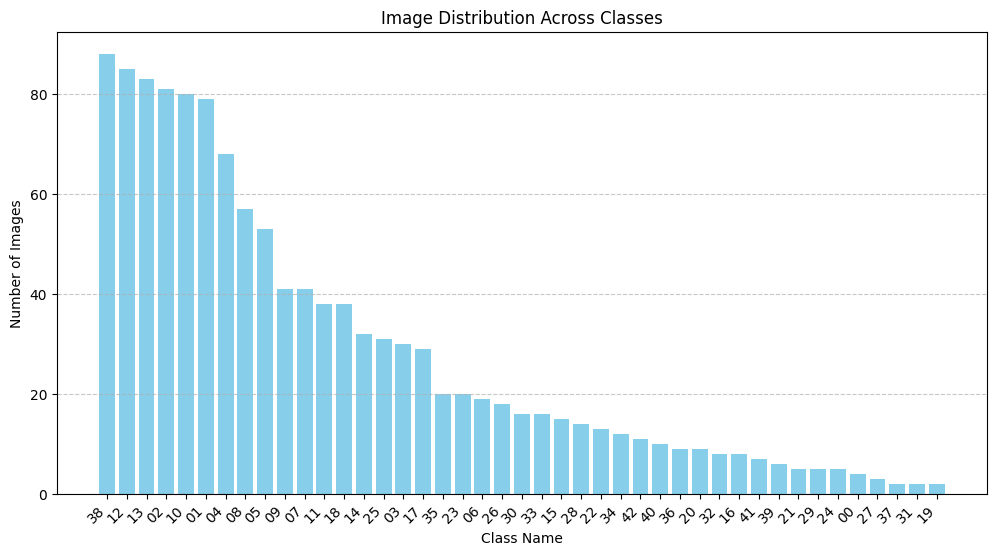

In [ ]:
class_counts = {}
for class_name in class_folders:

    class_length = len(os.listdir(os.path.join(main_dir, class_name)))
    print(f"Class: {class_name}, Length: {class_length}")

    class_counts[class_name] = class_length

# Sort by class name (optional)
class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')

plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.title("Image Distribution Across Classes")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [ ]:
# Reshape to 2D (900x3) for normalization
image_array = np.array(arrays)

In [ ]:
image_array

array([[[[ 28,  24,  22],
         [ 27,  24,  22],
         [ 26,  23,  21],
         ...,
         [ 40,  28,  22],
         [ 37,  28,  22],
         [ 36,  28,  22]],

        [[ 31,  26,  25],
         [ 28,  25,  24],
         [ 28,  25,  23],
         ...,
         [ 35,  25,  22],
         [ 36,  27,  23],
         [ 36,  27,  23]],

        [[ 32,  26,  25],
         [ 31,  25,  25],
         [ 30,  25,  23],
         ...,
         [ 35,  27,  23],
         [ 38,  30,  26],
         [ 38,  27,  23]],

        ...,

        [[ 23,  21,  22],
         [ 24,  22,  23],
         [ 24,  22,  22],
         ...,
         [ 21,  19,  20],
         [ 23,  18,  18],
         [ 25,  20,  20]],

        [[ 25,  21,  22],
         [ 26,  22,  22],
         [ 25,  21,  21],
         ...,
         [ 23,  20,  21],
         [ 26,  21,  21],
         [ 27,  22,  22]],

        [[ 27,  23,  23],
         [ 27,  23,  23],
         [ 28,  23,  23],
         ...,
         [ 23,  20,  20],
        

In [ ]:
normalized_images = image_array / 255.0

In [ ]:
len(normalized_images)

1213

In [ ]:
len(labels)

1213

### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [ ]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(normalized_images, labels, test_size=0.2, random_state=42)

In [ ]:
X_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
X_flattened.shape

(970, 2700)

In [ ]:
X_test_flattened.shape

(243, 2700)

In [ ]:
y_train.shape,y_test.shape

((970,), (243,))

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [ ]:
param_grid = {
    'batch_size': [20,50,45,30,25,10,15],
    'optimizer': ['adam', 'rmsprop'], # Pass optimizer directly to create_model
    'n_neurons': [128, 64, 32], # Experiment with different neuron counts
}

In [ ]:
def create_model(n_neurons=32, optimizer='adam', hidden_activation='relu'):
    model = Sequential([
        Dense(n_neurons, activation= hidden_activation, input_dim=X_flattened.shape[1]),
        Dense(64, activation=hidden_activation),  # Assuming 64 neurons in this layer
        Dense(32, activation=hidden_activation),
        Dense(43, activation='softmax')  # Output layer
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
!pip install scikit-learn==1.3.1

  Using cached scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.3.1 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [ ]:
!pip install scikeras

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.1
    Uninstalling scikit-learn-1.3.1:
      Successfully uninstalled scikit-learn-1.3.1


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model_new = KerasClassifier(
    model=create_model,
    optimizer='adam', # Provide default values here
    n_neurons=32,
    hidden_activation='relu',
    epochs=10,
    # batch_size=32,
    verbose=0
)

#### Training the model

In [ ]:
model = create_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_flattened, y_train, epochs=10, batch_size=32)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.0392 - loss: 3.6969
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1098 - loss: 3.3839
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2210 - loss: 3.0982
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2855 - loss: 2.7503
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3352 - loss: 2.5318
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4171 - loss: 2.3191
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4352 - loss: 2.2255
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4181 - loss: 2.0221
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4704 - loss: 1.9071
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4978 - loss: 1.7155


#### Evaluating the model

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_flattened, y_test, verbose=1)

# Print the results
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.4456 - loss: 2.2583
Test Loss: 1.9869465827941895
Test Accuracy: 0.49794238805770874


#### Using the Grid search with hyperparametrs

In [ ]:
# print("scikit-learn version:", sklearn.__version__)
# print("scikeras version:", scikeras.__version__)
# print("TensorFlow version:", tf.__version__)

#### Defining the KerasClassifier

In [ ]:
gs= GridSearchCV(estimator=model_new,param_grid=param_grid,scoring='accuracy',cv=2,
                     n_jobs=-1,return_train_score=True,verbose=0)

In [ ]:
X_flattened.shape,y_train.shape

((970, 2700), (970,))

In [ ]:
grid_result = gs.fit(X_flattened, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)

In [ ]:
X_test_flattened.shape

In [ ]:
y_test.shape

In [ ]:
# Predict on test data using the best model found by GridSearchCV
y_pred = gs.best_estimator_.predict(X_test_flattened)

# Print predictions
print("Predicted labels:", y_pred)

# Evaluate model performance
# test_loss, test_acc =
gs.best_estimator_.score(X_test_flattened, y_test)
# print(f"Test Loss: {test_loss:.4f}")
# print(f"Test Accuracy: {test_acc:.4f}")


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

#### Try the different algorithms and compare the results with MLP classifier

In [ ]:
# YOUR CODE HERE
mlp = MLPClassifier(hidden_layer_sizes=(128,64,32),activation="relu",solver='adam', max_iter=200)
mlp.fit(X_flattened, y_train)
y_pred_mlp = mlp.predict(X_test_flattened)
mlp_acc = accuracy_score(y_test, y_pred_mlp)

print("MLP Classifier Accuracy:", mlp_acc)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NameError: name 'accuracy_score' is not defined

In [ ]:
RandomForestClassifier?

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_flattened, y_train)
y_pred_rf = rf.predict(X_test_flattened)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("Random Forest Classifier Accuracy:", rf_acc)

Random Forest Classifier Accuracy: 0.6666666666666666


In [ ]:
# 4. Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(X_flattened, y_train)
y_pred_lr = lr.predict(X_test_flattened)
lr_acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 0.8477366255144033


In [ ]:
XGBClassifier?

In [ ]:
try:
    from xgboost import XGBClassifier
    xgb = XGBClassifier(n_estimators=100,max_depth=15,learning_rate=0.01)
    xgb.fit(X_flattened, y_train)
    y_pred_xgb = xgb.predict(X_test_flattened)
    xgb_acc = accuracy_score(y_test, y_pred_xgb)
    print("XGBoost Classifier Accuracy:", xgb_acc)
except ImportError:
    xgb_acc = None  # Skip XGBoost if not installed

XGBoost Classifier Accuracy: 0.6419753086419753


### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [ ]:
print(tf.__version__)

In [ ]:
!pip -qq install livelossplot

In [ ]:
import livelossplot

In [ ]:
# Step 1 - Build the architecture
# YOUR CODE HERE

model = Sequential()

model.add(Dense(128, activation='relu', input_dim=X_flattened.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(43, activation='softmax'))



In [ ]:
# Step 2 - Compile the model
# YOUR CODE HERE
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE
plot_losses = livelossplot.PlotLossesKeras()

model.fit(X_flattened, y_train, epochs=10, batch_size=24, verbose=1, validation_split=0.2,callbacks=[plot_losses])

Epoch 1/10


InternalError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 699, in <lambda>

  File "/usr/local/lib/python3.11/dist-packages/tornado/ioloop.py", line 750, in _run_callback

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 824, in inner

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 785, in run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/tornado/gen.py", line 233, in wrapper

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-54-b3aeb793c17d>", line 5, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

ptxas exited with non-zero error code 2, output: : If the error message indicates that a file could not be written, please verify that sufficient filesystem space is provided.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_13203]

#### Try the same parameters used for MLP Classifier and build the keras model

In [ ]:
# YOUR CODE HERE
from sklearn.metrics import accuracy_score
mlp = MLPClassifier(hidden_layer_sizes=(128,64,32),activation="relu",solver='adam', max_iter=200)
mlp.fit(X_flattened, y_train)
y_pred_mlp = mlp.predict(X_test_flattened)
mlp_acc = accuracy_score(y_test, y_pred_mlp)

print("MLP Classifier Accuracy:", mlp_acc)

MLP Classifier Accuracy: 0.8518518518518519


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Experiment using Dropout, Regularization and Batch Normalization

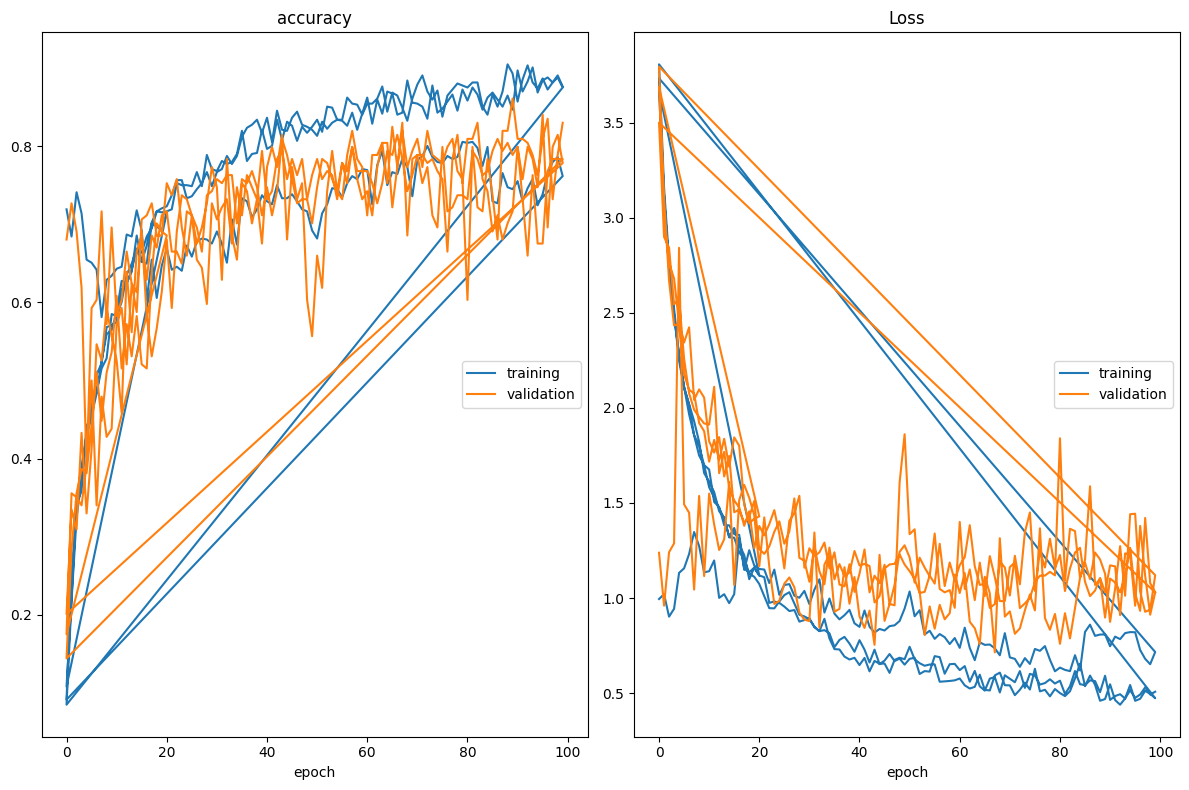

accuracy
	training         	 (min:    0.085, max:    0.905, cur:    0.876)
	validation       	 (min:    0.144, max:    0.861, cur:    0.830)
Loss
	training         	 (min:    0.439, max:    3.807, cur:    0.508)
	validation       	 (min:    0.714, max:    3.795, cur:    1.032)
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8761 - loss: 0.4835 - val_accuracy: 0.8299 - val_loss: 1.0315
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8304 - loss: 0.8485 
Keras Model Accuracy: [0.7706691026687622, 0.8395061492919922]


In [ ]:
# YOUR CODE HERE

from tensorflow.keras.regularizers import l2

# Build a Keras Model
def build_model():
    model = Sequential([
        Dense(128, kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Dropout(0.3),

        Dense(64, kernel_regularizer=l2(0.0001)),
        BatchNormalization(),
        tf.keras.layers.ReLU(),
        Dropout(0.3),

        Dense(43, activation="softmax")
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Train the Model
model = build_model()


history = model.fit(X_flattened, y_train, epochs=100, batch_size=24, verbose=1, validation_split=0.2,callbacks=[plot_losses])

# Evaluate
test_acc = model.evaluate(X_test_flattened, y_test)
print("Keras Model Accuracy:", test_acc)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
predictions = np.argmax(model.predict(X_test_flattened),axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
cm = confusion_matrix(y_test,predictions,labels=np.unique(y_train))

In [ ]:
disp.plot?

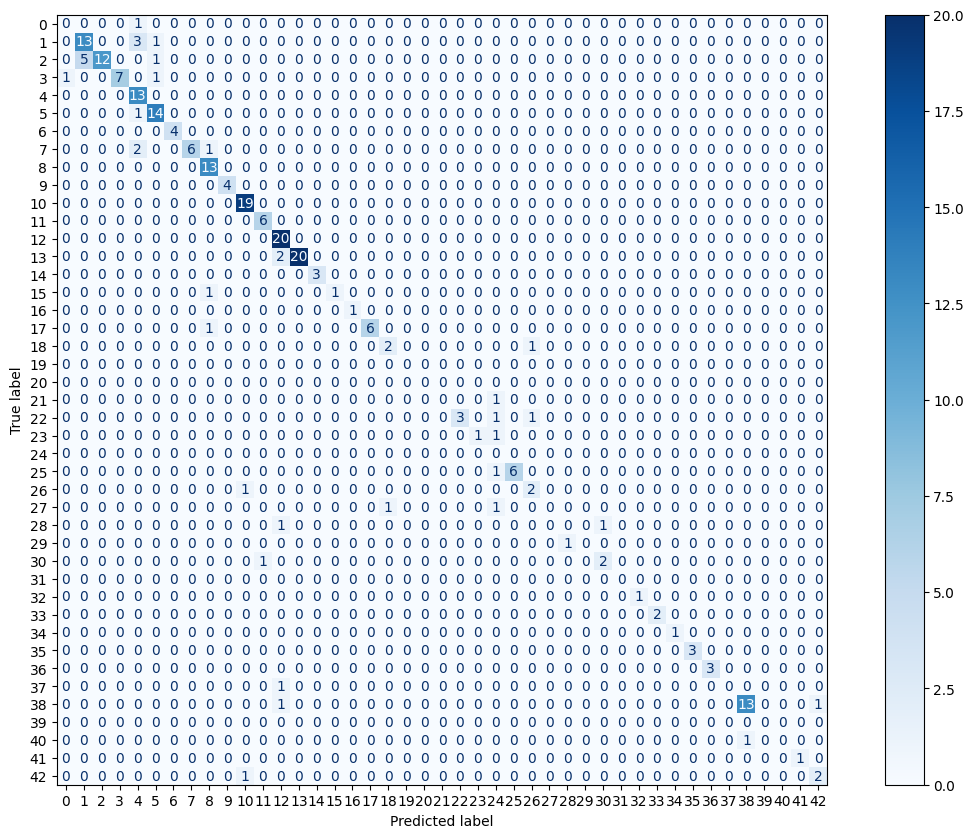

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=np.unique(y_train))
fig, ax = plt.subplots(figsize=(15, 10))
disp.plot(cmap='Blues',ax=ax)  # You can change the colormap if needed


# Show the plot
plt.show()

In [ ]:
np.argmax(model.predict(X_test_flattened),axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([ 8,  6,  1, 12,  4,  0, 10,  2, 33, 42,  2, 33,  5,  5, 30,  8,  7,
       12,  8, 12,  8,  5, 10,  6, 10,  4, 24, 38,  1, 12, 25, 10, 12,  9,
       13,  8,  7, 38, 26,  8,  1, 35,  9, 17, 12, 11, 12, 25,  1, 12, 18,
       13,  4, 42, 13, 36,  5,  1, 42, 10, 12,  1, 13,  4,  3, 38,  2, 13,
       12, 10,  1,  1, 14,  1, 10, 15,  1,  5, 13, 17, 13, 38,  2, 26,  8,
       26, 17, 13, 36,  1,  5,  2, 10, 12,  8,  5, 10,  5, 38,  1, 30, 16,
       10,  4,  4,  4, 10,  7, 14,  2,  1, 12, 13, 38, 34,  3,  2, 10,  2,
        3,  5, 14,  5,  8,  5, 13, 24,  2,  2,  9,  4, 13,  7,  8, 10,  8,
        3, 13,  5, 10,  1,  5, 12, 12, 12, 10, 24, 38, 13,  5, 13, 11, 24,
       13,  6, 38, 13,  5,  3,  2,  4, 11, 22, 38, 17, 10, 12, 30, 13,  8,
        8, 38,  3, 38, 23, 25, 36, 12,  5, 41, 10,  6, 12, 11, 38, 12, 11,
        4, 38, 12, 28, 25, 35, 22,  4, 12, 22, 13, 24, 10,  5, 11,  7,  4,
        4, 26, 25, 35, 12,  1, 12, 13, 25,  4,  3, 17, 12, 13, 10,  1,  4,
        8,  4, 12, 17,  4

In [ ]:
y_test

array([ 8,  6,  1, 12,  4,  3, 10,  2, 33, 42,  2, 33,  3,  5, 30, 15,  7,
       12,  8, 12,  8,  2, 10,  6, 10,  4, 21, 40,  1, 12, 25, 10, 12,  9,
       13,  8,  7, 38, 22,  8,  1, 35,  9, 17, 28, 11, 12, 25,  1, 13, 27,
       13,  4, 42, 13, 36,  5,  1, 38, 10, 12,  1, 13,  4,  3, 38,  2, 13,
       13, 10,  2,  1, 14,  1, 42, 15,  1,  5, 13, 17, 13, 38,  2, 18,  8,
       26, 17, 13, 36,  2,  1,  2, 10, 12,  8,  5, 10,  5, 38,  1, 28, 16,
       10,  1,  1,  4, 10,  7, 14,  2,  2, 37, 13, 38, 34,  3,  2, 10,  2,
        3,  5, 14,  5,  8,  5, 13, 25,  2,  2,  9,  4, 13,  7,  8, 10,  8,
        3, 13,  5, 10,  2,  5, 12, 12, 12, 10, 27, 38, 13,  5, 13, 11, 22,
       13,  6, 38, 13,  5,  3,  2,  0, 30, 22, 38, 17, 10, 12, 30, 13,  7,
       17, 38,  3, 38, 23, 25, 36, 12,  5, 41, 10,  6, 12, 11, 38, 12, 11,
        4, 38, 12, 29, 25, 35, 22,  4, 12, 22, 13, 23, 10,  5, 11,  7,  4,
        7, 26, 25, 35, 12,  1, 12, 13, 25,  7,  3, 17, 12, 13, 26,  2,  4,
        8,  4, 38, 17,  5

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Reference: J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.